In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from scipy import stats

In [41]:
import csv
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from modules.util import dists_to_arch, edit_distance
from modules.FitnessLandscapeAnalysis import FitnessLandscapeAnalysis

plt.rcParams.update({'font.size': 16})

In [42]:
df = pd.read_csv("nats_bench.csv")
genotypes = list(df["ArchitectureString"].values)
phenotypes = list(df["UniqueString"].values)
CIFAR10_FLA = FitnessLandscapeAnalysis(df["CIFAR10TestAccuracy200Epochs"], genotypes, phenotypes, "CIFAR10")
CIFAR100_FLA = FitnessLandscapeAnalysis(df["CIFAR100TestAccuracy200Epochs"], genotypes, phenotypes, "CIFAR100")
ImageNet_FLA = FitnessLandscapeAnalysis(df["ImageNetTestAccuracy200Epochs"], genotypes, phenotypes, "ImageNet")

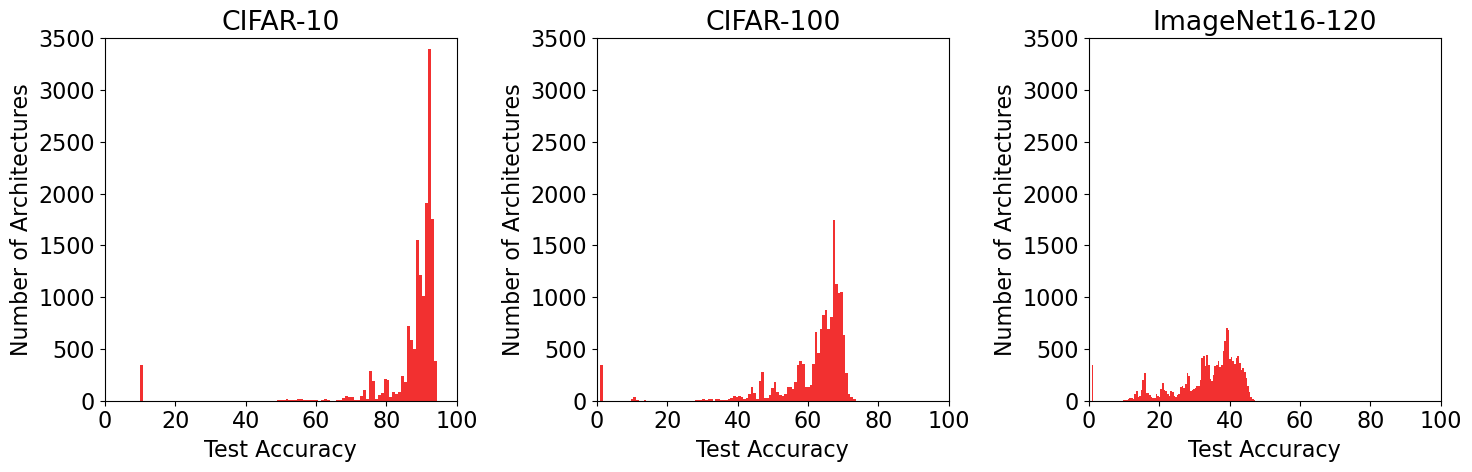

In [43]:
# Density of States 1
plt.figure(figsize=(15, 5))

########## CIFAR-10 ##########
plt.subplot(1, 3, 1)
plt.hist(CIFAR10_FLA.get_fits(), bins=100, color="#F23030")
plt.xlim(left=0, right=100)
plt.ylim(bottom=0, top=3500)

# Labels
plt.xlabel("Test Accuracy")
plt.ylabel("Number of Architectures")
plt.title("CIFAR-10")

########## CIFAR-100 ##########
plt.subplot(1, 3, 2)
plt.hist(CIFAR100_FLA.get_fits(), bins=100, color="#F23030")
plt.xlim(left=0, right=100)
plt.ylim(bottom=0, top=3500)

# Labels
plt.xlabel("Test Accuracy")
plt.ylabel("Number of Architectures")
plt.title("CIFAR-100")

########## ImageNet16-120 ##########
plt.subplot(1, 3, 3)
plt.hist(ImageNet_FLA.get_fits(), bins=100, color="#F23030")
plt.xlim(left=0, right=100)
plt.ylim(bottom=0, top=3500)

# Labels
plt.xlabel("Test Accuracy")
plt.ylabel("Number of Architectures")
plt.title("ImageNet16-120")

plt.tight_layout()

plt.savefig("visualizations/density_of_states.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


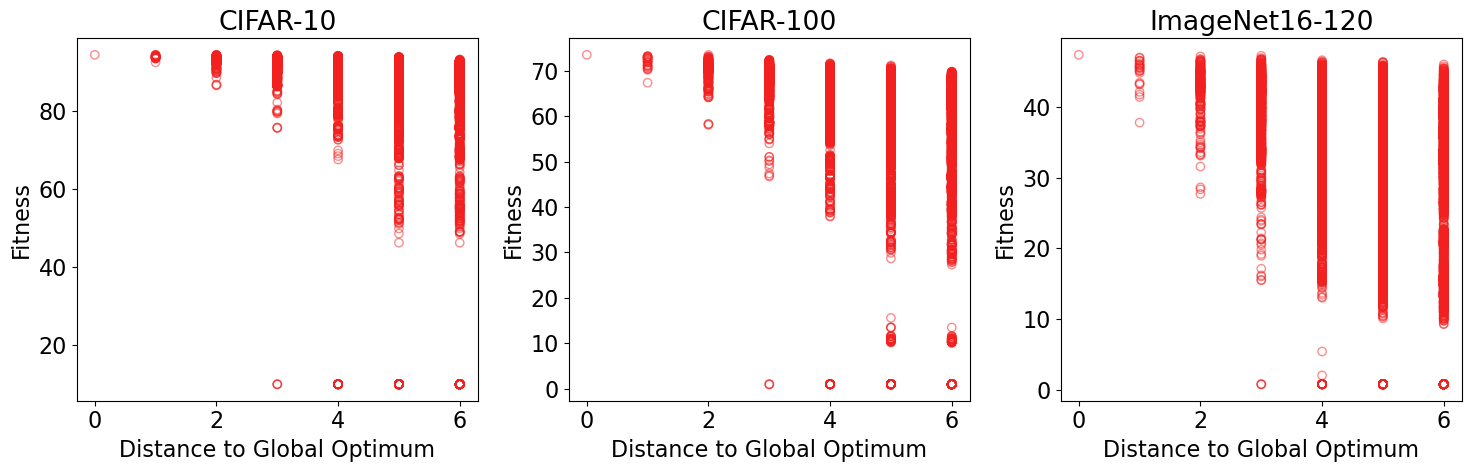

In [44]:
# Fitness Distance Correlation
plt.figure(figsize=(15, 5))

########## CIFAR-10 ##########
plt.subplot(1, 3, 1)
plt.scatter(CIFAR10_FLA.get_dists_to_global_max(), CIFAR10_FLA.get_fits(), edgecolor="#F32020", facecolor="none", alpha=0.5)

# Labels
plt.xlabel("Distance to Global Optimum")
plt.ylabel("Fitness")
plt.title("CIFAR-10")

########## CIFAR-100 ##########
plt.subplot(1, 3, 2)
plt.scatter(CIFAR100_FLA.get_dists_to_global_max(), CIFAR100_FLA.get_fits(), edgecolor="#F32020", facecolor="none", alpha=0.5)

# Labels
plt.xlabel("Distance to Global Optimum")
plt.ylabel("Fitness")
plt.title("CIFAR-100")

########## ImageNet16-120 ##########
plt.subplot(1, 3, 3)
plt.scatter(ImageNet_FLA.get_dists_to_global_max(), ImageNet_FLA.get_fits(), edgecolor="#F32020", facecolor="none", alpha=0.5)

# Labels
plt.xlabel("Distance to Global Optimum")
plt.ylabel("Fitness")
plt.title("ImageNet16-120")

plt.tight_layout()
plt.savefig("visualizations/FDC.eps")
plt.show()

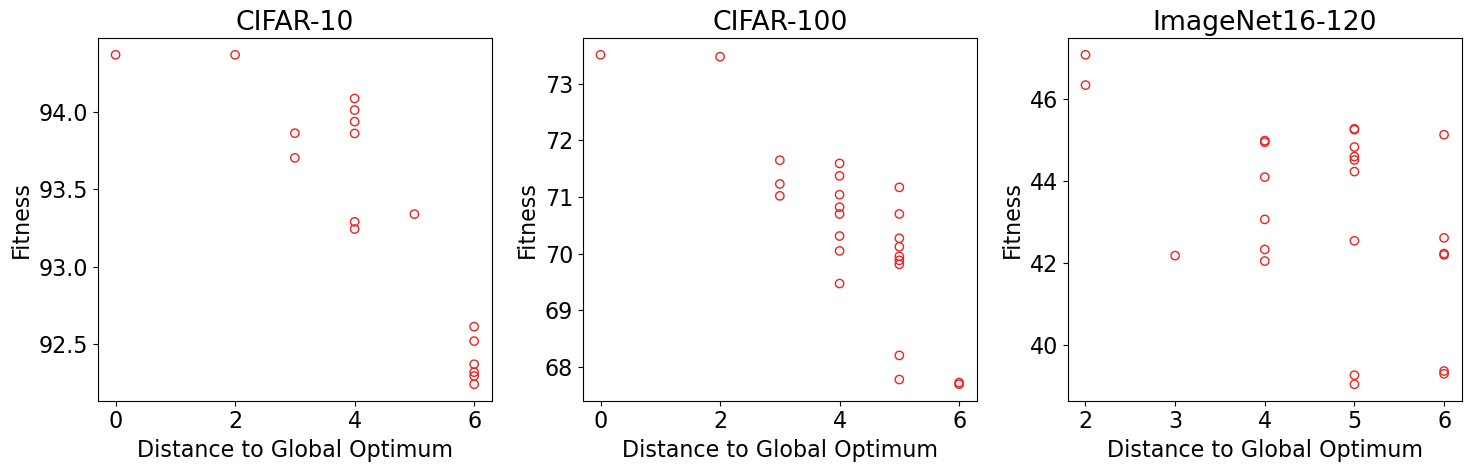

In [45]:
# FDC Optima Only
# Fitness Distance Correlation
plt.figure(figsize=(15, 5))

########## CIFAR-10 ##########
with open("CIFAR10/data/local_maxima.csv") as local_max_f:
    local_maxima = [int(i) for i in list(next(csv.reader(local_max_f)))]
maxima_genotypes = [genotypes[i] for i in local_maxima]
maxima_dists = [edit_distance(genotype, genotypes[CIFAR10_FLA.get_global_max()]) for genotype in maxima_genotypes]
maxima_fits = [CIFAR10_FLA.get_fits()[i] for i in local_maxima]

plt.subplot(1, 3, 1)
plt.scatter(maxima_dists, maxima_fits, edgecolor="#F32020", facecolor="none")

# Labels
plt.xlabel("Distance to Global Optimum")
plt.ylabel("Fitness")
plt.title("CIFAR-10")

########## CIFAR-100 ##########
with open("CIFAR100/data/local_maxima.csv") as local_max_f:
    local_maxima = [int(i) for i in list(next(csv.reader(local_max_f)))]
maxima_genotypes = [genotypes[i] for i in local_maxima]
maxima_dists = [edit_distance(genotype, genotypes[CIFAR100_FLA.get_global_max()]) for genotype in maxima_genotypes]
maxima_fits = [CIFAR100_FLA.get_fits()[i] for i in local_maxima]

plt.subplot(1, 3, 2)
plt.scatter(maxima_dists, maxima_fits, edgecolor="#F32020", facecolor="none")

# Labels
plt.xlabel("Distance to Global Optimum")
plt.ylabel("Fitness")
plt.title("CIFAR-100")

########## ImageNet16-120 ##########
with open("CIFAR100/data/local_maxima.csv") as local_max_f:
    local_maxima = [int(i) for i in list(next(csv.reader(local_max_f)))]
maxima_genotypes = [genotypes[i] for i in local_maxima]
maxima_dists = [edit_distance(genotype, genotypes[ImageNet_FLA.get_global_max()]) for genotype in maxima_genotypes]
maxima_fits = [ImageNet_FLA.get_fits()[i] for i in local_maxima]

plt.subplot(1, 3, 3)
plt.scatter(maxima_dists, maxima_fits, edgecolor="#F32020", facecolor="none")

# Labels
plt.xlabel("Distance to Global Optimum")
plt.ylabel("Fitness")
plt.title("ImageNet16-120")

plt.tight_layout()
plt.savefig("visualizations/FDC_only_optima.eps")
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


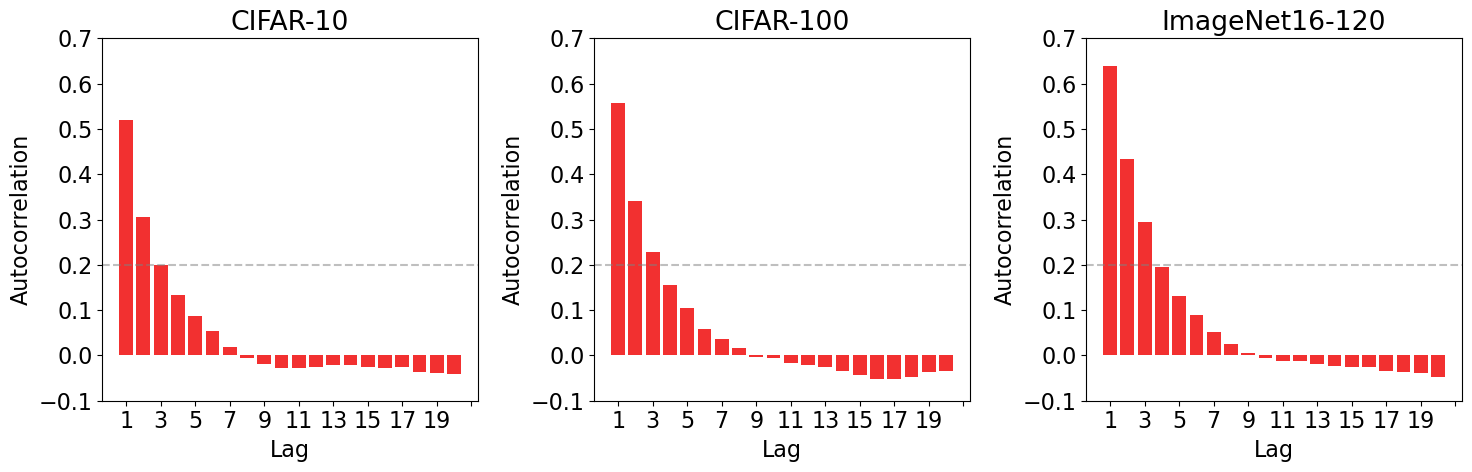

In [46]:
# Autocorrelation
plt.figure(figsize=(15,5))
########## CIFAR-10 ##########
plt.subplot(1, 3, 1)
# Extract lags and corresponding autocorrelations
with open("CIFAR10/autocorrelations.json", "r") as autocorrs_f:
    autocorrs_dict = json.load(autocorrs_f)
lags = autocorrs_dict.keys()
autocorrs = autocorrs_dict.values()
plt.bar(lags, autocorrs, color="#F23030")
plt.xticks(np.arange(0, 21, 2))
plt.ylim(bottom=-0.1, top=0.7)

# Threshold between "difficult" and "straightforward"
plt.axhline(y=0.2, color='gray', linestyle='--', alpha=0.5)
# Labels
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("CIFAR-10")

########## CIFAR-100 ##########
plt.subplot(1, 3, 2)
# Extract lags and corresponding autocorrelations
with open("CIFAR100/autocorrelations.json", "r") as autocorrs_f:
    autocorrs_dict = json.load(autocorrs_f)
lags = autocorrs_dict.keys()
autocorrs = autocorrs_dict.values()
plt.bar(lags, autocorrs, color="#F23030")
plt.xticks(np.arange(0, 21, 2))
plt.ylim(bottom=-0.1, top=0.7)

# Threshold between "difficult" and "straightforward"
plt.axhline(y=0.2, color='gray', linestyle='--', alpha=0.5)
# Labels
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("CIFAR-100")

########## ImageNet16-120 ##########
plt.subplot(1, 3, 3)
# Extract lags and corresponding autocorrelations
with open("ImageNet/autocorrelations.json", "r") as autocorrs_f:
    autocorrs_dict = json.load(autocorrs_f)
lags = autocorrs_dict.keys()
autocorrs = autocorrs_dict.values()
plt.bar(lags, autocorrs, color="#F23030")
plt.xticks(np.arange(0, 21, 2))
plt.ylim(bottom=-0.1, top=0.7)

# Threshold between "difficult" and "straightforward"
plt.axhline(y=0.2, color='gray', linestyle='--', alpha=0.5)
# Labels
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("ImageNet16-120")

plt.tight_layout()
plt.savefig("visualizations/autocorrelations.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


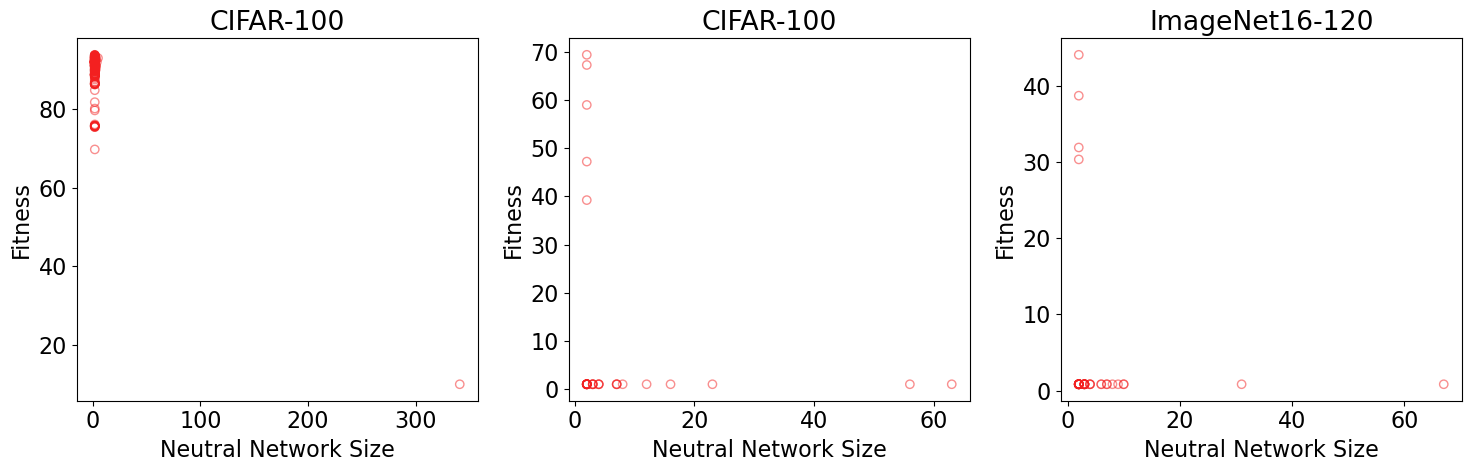

In [47]:
# Neutral Networks
plt.figure(figsize=(15, 5))
########## CIFAR-10 ##########
with open("CIFAR10/data/neutral_networks.csv", "r") as nn_f:
    x = []
    y = []
    for nn_l in csv.reader(nn_f):
        nn = list(nn_l)
        x.append(len(nn))
        y.append(df.at[int(nn[0]), "CIFAR10TestAccuracy200Epochs"])
plt.subplot(1, 3, 1)
plt.scatter(x, y, edgecolor="#F32020", facecolor="none", alpha=0.5)

plt.xlabel("Neutral Network Size")
plt.ylabel("Fitness")
plt.title("CIFAR-100")

########## CIFAR-100 ##########
with open("CIFAR100/data/neutral_networks.csv", "r") as nn_f:
    x = []
    y = []
    for nn_l in csv.reader(nn_f):
        nn = list(nn_l)
        x.append(len(nn))
        y.append(df.at[int(nn[0]), "CIFAR100TestAccuracy200Epochs"])
plt.subplot(1, 3, 2)
plt.scatter(x, y, edgecolor="#F32020", facecolor="none", alpha=0.5)

plt.xlabel("Neutral Network Size")
plt.ylabel("Fitness")
plt.title("CIFAR-100")

########## ImageNet16-120 ##########
with open("ImageNet/data/neutral_networks.csv", "r") as nn_f:
    x = []
    y = []
    for nn_l in csv.reader(nn_f):
        nn = list(nn_l)
        x.append(len(nn))
        y.append(df.at[int(nn[0]), "ImageNetTestAccuracy200Epochs"])
plt.subplot(1, 3, 3)
plt.scatter(x, y, edgecolor="#F32020", facecolor="none", alpha=0.5)

plt.xlabel("Neutral Network Size")
plt.ylabel("Fitness")
plt.title("ImageNet16-120")

plt.tight_layout()
plt.savefig("visualizations/neutral_networks.eps")

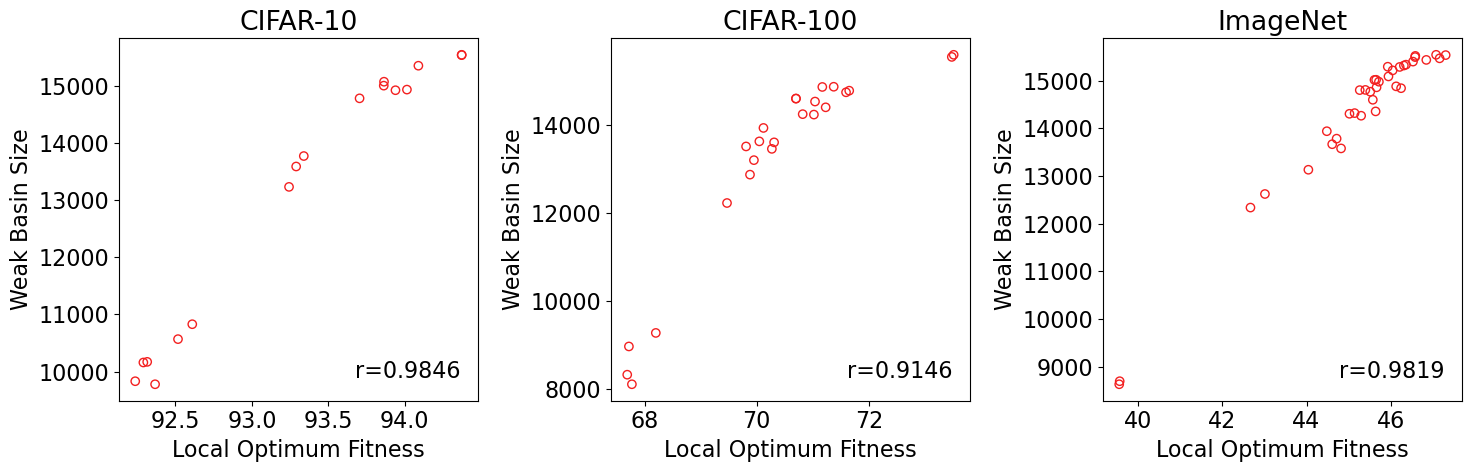

In [48]:
# Basins of Attraction
plt.figure(figsize=(15, 5))

########## CIFAR-10 ##########
with open("CIFAR10/data/local_maxima.csv") as local_max_f:
    local_maxima = [int(i) for i in list(next(csv.reader(local_max_f)))]
maxima_fits = [CIFAR10_FLA.get_fits()[i] for i in local_maxima]
weak_basin_sizes = []
# get the sizes of the weak basins
for i in local_maxima:
    with open(f"CIFAR10/data/weak_basins/local_max_{i}_weak_basin.csv") as weak_basin_f:
        weak_basin = list(next(csv.reader(weak_basin_f)))
        weak_basin_sizes.append(len(weak_basin))

plt.subplot(1, 3, 1)
plt.scatter(maxima_fits, weak_basin_sizes, edgecolor="#F32020", facecolor="none")
corr_coef = np.corrcoef(maxima_fits, weak_basin_sizes)[0,1]
plt.text(0.95, 0.05, f"r={corr_coef:.4f}", horizontalalignment="right", verticalalignment="bottom", transform=plt.gca().transAxes)

# Labels
plt.xlabel("Local Optimum Fitness")
plt.ylabel("Weak Basin Size")
plt.title("CIFAR-10")

########## CIFAR-100 ##########
with open("CIFAR100/data/local_maxima.csv") as local_max_f:
    local_maxima = [int(i) for i in list(next(csv.reader(local_max_f)))]
maxima_fits = [CIFAR100_FLA.get_fits()[i] for i in local_maxima]
weak_basin_sizes = []
# get the sizes of the weak basins
for i in local_maxima:
    with open(f"CIFAR100/data/weak_basins/local_max_{i}_weak_basin.csv") as weak_basin_f:
        weak_basin = list(next(csv.reader(weak_basin_f)))
        weak_basin_sizes.append(len(weak_basin))

plt.subplot(1, 3, 2)
plt.scatter(maxima_fits, weak_basin_sizes, edgecolor="#F32020", facecolor="none")

# Labels
plt.xlabel("Local Optimum Fitness")
plt.ylabel("Weak Basin Size")
plt.title("CIFAR-100")

corr_coef = np.corrcoef(maxima_fits, weak_basin_sizes)[0,1]
plt.text(0.95, 0.05, f"r={corr_coef:.4f}", horizontalalignment="right", verticalalignment="bottom", transform=plt.gca().transAxes)

########## ImageNet16-120 ##########
with open("ImageNet/data/local_maxima.csv") as local_max_f:
    local_maxima = [int(i) for i in list(next(csv.reader(local_max_f)))]
maxima_fits = [ImageNet_FLA.get_fits()[i] for i in local_maxima]
weak_basin_sizes = []
# get the sizes of the weak basins
for i in local_maxima:
    with open(f"ImageNet/data/weak_basins/local_max_{i}_weak_basin.csv") as weak_basin_f:
        weak_basin = list(next(csv.reader(weak_basin_f)))
        weak_basin_sizes.append(len(weak_basin))

plt.subplot(1, 3, 3)
plt.scatter(maxima_fits, weak_basin_sizes, edgecolor="#F32020", facecolor="none")

# Labels
plt.xlabel("Local Optimum Fitness")
plt.ylabel("Weak Basin Size")
plt.title("ImageNet")

corr_coef = np.corrcoef(maxima_fits, weak_basin_sizes)[0,1]
plt.text(0.95, 0.05, f"r={corr_coef:.4f}", horizontalalignment="right", verticalalignment="bottom", transform=plt.gca().transAxes)
plt.tight_layout()
plt.savefig("visualizations/basins_of_attraction.eps")
plt.show()
